<a href="https://colab.research.google.com/github/garrettfenchel/Predicting-Poverty-HH-data-/blob/main/Predicting_Poverty_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data Import


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
poverty_original = pd.read_excel("/content/drive/MyDrive/Work/Unilever/Data Science/Project 2/Poverty Data.xlsx")


In [5]:
poverty = poverty_original
poverty

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,C,True,50.0,False,True,P,Head,1.0,True,...,True,False,False,False,False,False,2,0,1,0.990
12596,12596,D,False,90.0,False,False,O,Head,0.0,True,...,False,False,False,False,False,False,0,0,0,0.950
12597,12597,J,False,52.0,True,False,X,Head,1.0,False,...,True,False,False,False,True,False,0,1,0,0.342
12598,12598,I,False,40.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.846


In [6]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   row_id                                 12600 non-null  int64  
 1   country                                12600 non-null  object 
 2   is_urban                               12600 non-null  bool   
 3   age                                    12600 non-null  float64
 4   female                                 12600 non-null  bool   
 5   married                                12600 non-null  bool   
 6   religion                               12600 non-null  object 
 7   relationship_to_hh_head                12600 non-null  object 
 8   education_level                        12364 non-null  float64
 9   literacy                               12600 non-null  bool   
 10  can_add                                12600 non-null  bool   
 11  ca

In [ ]:
#Checking duplicates
poverty[poverty.duplicated()]

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability


In [ ]:
#Checking categorical variables
poverty.value_counts(["employment_type_last_year"])


employment_type_last_year
not_working                  4513
self_employed                3113
irregular_seasonal           2349
salaried                     1960
other                         665
dtype: int64

In [ ]:
poverty.describe()

,row_id,age,education_level,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,bank_interest_rate,mm_interest_rate,mfi_interest_rate,other_fsp_interest_rate,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12600.000000,12600.000000,12364.000000,12295.000000,12600.000000,12600.000000,289.000000,151.000000,201.000000,239.000000,12600.000000,1.260000e+04,12600.00000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,6299.500000,36.280714,1.316241,2.888166,0.657698,0.866429,9.843080,9.021026,10.909204,8.216736,1.100159,5.510582e+14,1.20873,1.468254,0.714127,0.188968,1.559683,0.611272
std,3637.451031,15.145945,0.905442,1.564284,0.924598,0.960866,15.033089,13.620161,10.353298,10.649538,1.190072,3.724530e+15,1.09306,0.776638,0.805878,0.473696,2.043831,0.291476
min,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3149.750000,25.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.750000,5.000000,2.250000,0.000000,0.000000e+00,0.00000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6299.500000,33.000000,1.000000,2.000000,0.000000,0.000000,7.000000,7.000000,10.000000,6.000000,1.000000,2.000000e+00,1.00000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9449.250000,45.000000,2.000000,5.000000,1.000000,2.000000,14.000000,10.000000,15.000000,10.000000,2.000000,4.000000e+00,2.00000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,115.000000,3.000000,5.000000,3.000000,2.000000,100.000000,100.000000,100.000000,100.000000,5.000000,3.666667e+16,3.00000,2.000000,6.000000,4.000000,10.000000,1.000000


In [ ]:
#Create Poverty Boolean
#combine religion
#unknown and other relationship to hh head
#Add up math skills
#employed and unemployed
#combine borrowed
#combine phone skills
#combine bank account stuff


In [ ]:
#Create Poverty Boolean
def f_poverty(a):
  if a > .499:
    return 1 
  else:
    return 0
poverty["poverty_bool"] = np.vectorize(f_poverty)(poverty["poverty_probability"])


In [ ]:
#Combine O and N religion
def f_religion(a):
  if a == "O" or a == "N":
    return "O_N" 
  else:
    return a
poverty["religion_clean"] = np.vectorize(f_religion)(poverty["religion"])

In [ ]:
#Dropping Unknown Relationship
poverty = poverty[poverty['relationship_to_hh_head'] != "Unknown"]

In [ ]:
#Combining Math Skills
poverty['can_add'] = pd.factorize(poverty['can_add'])[0]
poverty['can_divide'] = pd.factorize(poverty['can_divide'])[0]
poverty['can_calc_percents'] = pd.factorize(poverty['can_calc_percents'])[0]
poverty['can_calc_compounding'] = pd.factorize(poverty['can_calc_compounding'])[0]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Combining Math Skills
def f_math(a,b,c,d):
    return int (a)+b+c+d
poverty["math_skill"] = np.vectorize(f_math)(poverty["can_add"],poverty["can_divide"],poverty["can_calc_percents"],poverty["can_calc_compounding"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 0 to 12599
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   row_id                                 12582 non-null  int64  
 1   country                                12582 non-null  object 
 2   is_urban                               12582 non-null  bool   
 3   age                                    12582 non-null  float64
 4   female                                 12582 non-null  bool   
 5   married                                12582 non-null  bool   
 6   religion                               12582 non-null  object 
 7   relationship_to_hh_head                12582 non-null  object 
 8   education_level                        12346 non-null  float64
 9   literacy                               12582 non-null  bool   
 10  can_add                                12582 non-null  int64  
 11  ca

In [ ]:
poverty.columns

Index(['row_id', 'country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'bank_interest_rate', 'mm_interest_rate',
       'mfi_interest_rate', 'other_fsp_interest_rate', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrow

In [ ]:
#Selecting Columns
poverty = poverty[['poverty_bool','country', 'is_urban', 'age', 'female', 'married', 'religion_clean',
       'relationship_to_hh_head', 'education_level', 'literacy',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'phone_technology',
       'phone_ownership', 'advanced_phone_use', 'reg_bank_acct', 'reg_mm_acct',
       'reg_formal_nbfi_account', 'financially_included', 'active_bank_user',
       'active_mm_user', 'active_formal_nbfi_user',
       'active_informal_nbfi_user', 'nonreg_active_mm_user',
       'num_formal_institutions_last_year',
       'num_informal_institutions_last_year',
       'num_financial_activities_last_year', 'math_skill']]


In [ ]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 0 to 12599
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12582 non-null  int64  
 1   is_urban                             12582 non-null  int64  
 2   age                                  12582 non-null  float64
 3   female                               12582 non-null  int64  
 4   married                              12582 non-null  int64  
 5   religion_clean                       12582 non-null  int64  
 6   relationship_to_hh_head              12582 non-null  int64  
 7   education_level                      12346 non-null  float64
 8   literacy                             12582 non-null  int64  
 9   employment_type_last_year            12582 non-null  int64  
 10  share_hh_income_provided             12277 non-null  float64
 11  income_ag_livestock_last_yea

In [ ]:
poverty

,row_id,country,is_urban,age,female,married,religion_clean,relationship_to_hh_head,education_level,literacy,...,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,math_skill,poverty_bool
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,False,False,False,False,1,0,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,False,False,False,False,1,0,0,2,1
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,0,0,0,1,1
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,0,0,0,1,1
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,1,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,C,True,50.0,False,True,P,Head,1.0,True,...,False,False,False,False,False,2,0,1,0,1
12596,12596,D,False,90.0,False,False,O_N,Head,0.0,True,...,False,False,False,False,False,0,0,0,1,1
12597,12597,J,False,52.0,True,False,X,Head,1.0,False,...,False,False,False,True,False,0,1,0,2,0
12598,12598,I,False,40.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,0,0,0,1,1


In [ ]:
poverty = poverty.replace(True,1)
poverty = poverty.replace(False,0)

In [ ]:
poverty['religion_clean'] = pd.factorize(poverty['religion_clean'])[0]
poverty['country'] = pd.factorize(poverty['country'])[0]
poverty['relationship_to_hh_head'] = pd.factorize(poverty['relationship_to_hh_head'])[0]
poverty['employment_type_last_year'] = pd.factorize(poverty['employment_type_last_year'])[0]


In [ ]:
poverty.describe()

,country,is_urban,age,female,married,religion_clean,relationship_to_hh_head,education_level,literacy,employment_type_last_year,...,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,math_skill,poverty_bool
count,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12346.000000,12582.000000,12582.000000,...,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000,12582.000000
mean,3.019631,0.328326,36.286441,0.557781,0.649022,1.308457,1.934351,1.316135,0.613813,1.358449,...,0.203863,0.241694,0.056032,0.144810,0.083770,0.714036,0.188762,1.558973,1.431966,0.644413
std,2.001115,0.469623,15.150076,0.496670,0.477295,0.710101,0.993412,0.905459,0.486894,1.254747,...,0.402884,0.428127,0.229993,0.351923,0.277054,0.805706,0.473164,2.042583,1.000964,0.478710
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,33.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,5.000000,1.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,6.000000,1.000000,115.000000,1.000000,1.000000,3.000000,5.000000,3.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,10.000000,4.000000,1.000000


In [ ]:
poverty["poverty_bool"].value_counts()

1    8108
0    4474
Name: poverty_bool, dtype: int64

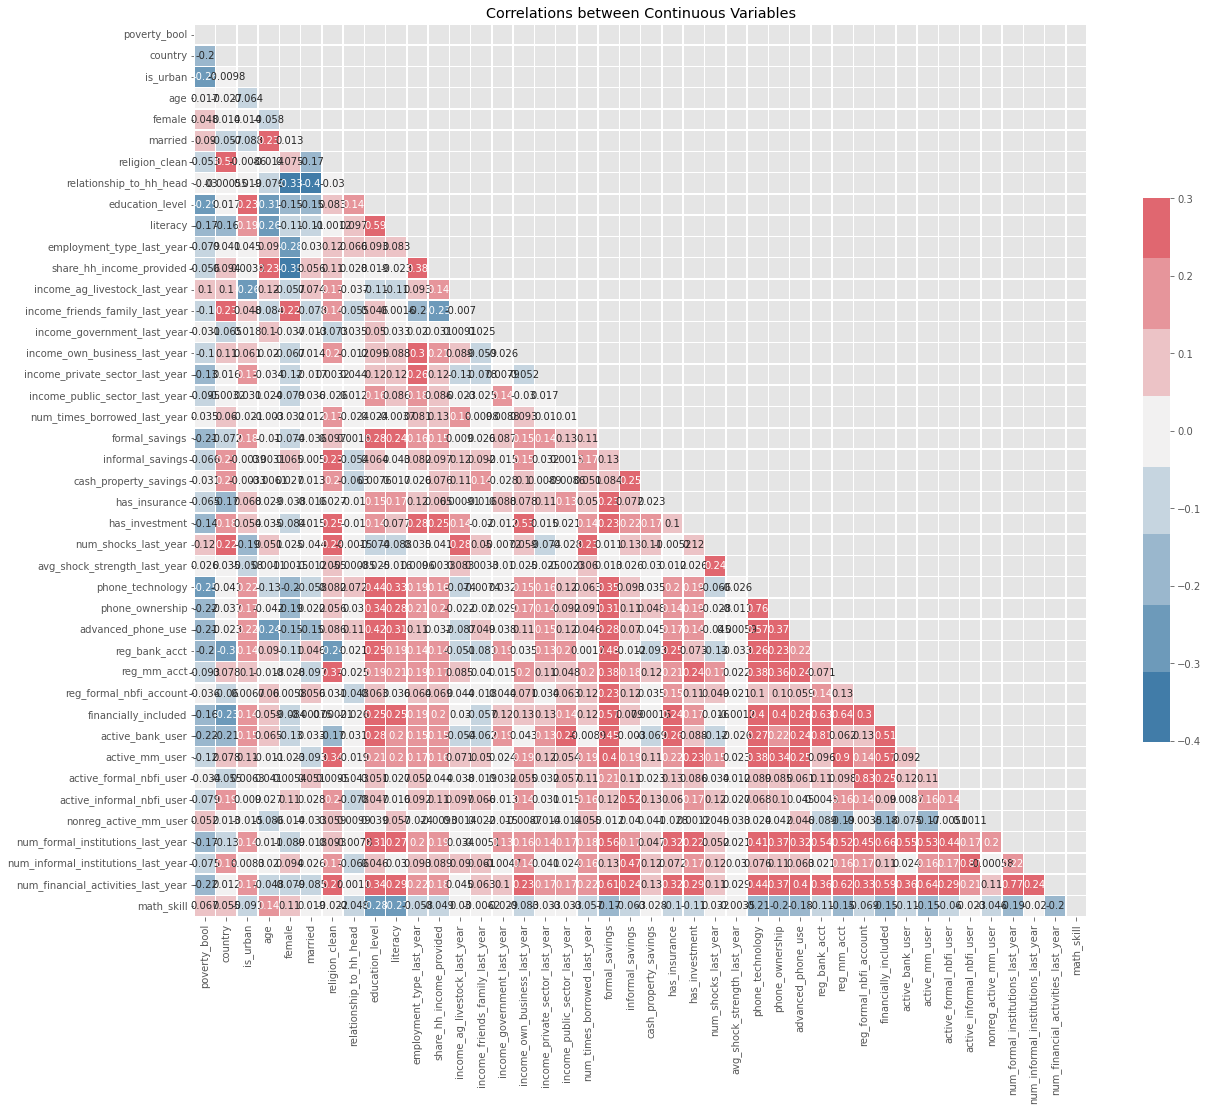

In [ ]:
correlation= poverty.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Continuous Variables')